## Loading the dataset

In [1]:
import pandas as pd

# Load the dataset
dataset_path = '/content/NER Dataset PS-6 - NER Dataset.csv'

In [2]:
import pandas as pd

# Sample function to extract a specified percentage of data from a DataFrame
def extract_percentage_data(df, percent):
    # Validate percent input
    if percent <= 0 or percent > 100:
        raise ValueError("Percentage must be greater than 0 and less than or equal to 100.")

    # Calculate the number of rows to extract based on the percentage
    num_samples = int(percent / 100 * len(df))

    # Randomly sample the specified percentage of the DataFrame
    sampled_df = df.sample(n=num_samples, random_state=42)  # You can adjust random_state as needed

    return sampled_df


data = pd.read_csv(dataset_path)

# Extract 20% of data
percent_to_extract = 5
df = extract_percentage_data(data, percent_to_extract)

##### Display the first few rows.

In [3]:
df.head()

,id,tokens,ner_tags
35078,1047956,['Other' 'Current' 'Liabilities' 'Other' 'curr...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
97863,1110741,"['As' 'of' 'March' '31' ',' '2020' 'and' '2019...",[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
47233,1060111,['A' 'failure' 'of' 'one' 'or' 'more' 'of' 'ou...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
16249,1029127,['APS' 'filed' 'a' 'motion' 'to' 'intervene' '...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
20803,1033681,['We' 'have' 'adopted' 'this' 'standard' 'on' ...,[0 0 0 0 0 0 0 0 0 0 0 0]


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('tokens').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('ner_tags').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ner_tags'].value_counts()
    for x_label, grp in _df_4.groupby('tokens')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tokens')
_ = plt.ylabel('ner_tags')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['tokens'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='id', y='tokens', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['ner_tags'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='id', y='ner_tags', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

* Exploratory Data Analysis

Number of sentences after cleaning: 5418


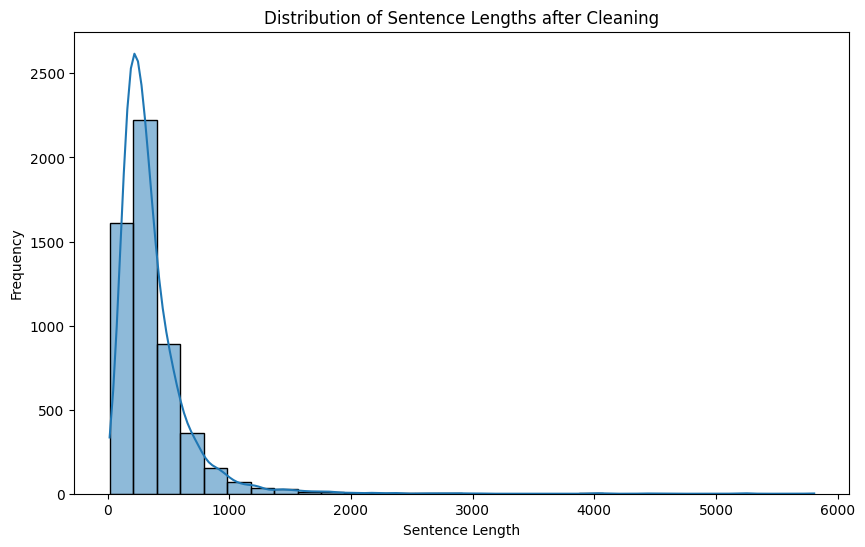

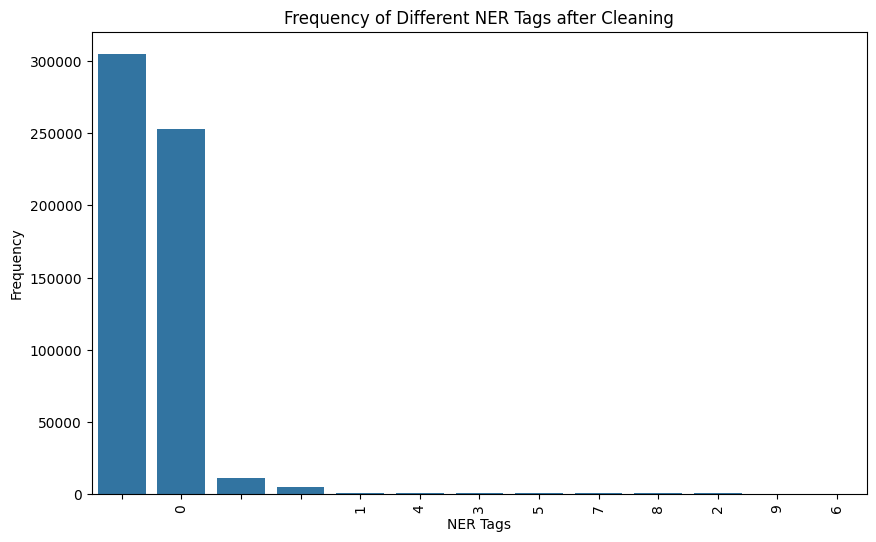

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is already loaded and contains 'tokens' and 'ner_tags' columns

# Remove duplicates based on entire rows
df.drop_duplicates(inplace=True)

# Clean special characters function
def clean_special_characters(text):
    special_characters = "!@#$%^&*()_+=-[]{}|:;',.<>/?"
    return text.translate(str.maketrans('', '', special_characters))

# Clean tokens column
df['tokens'] = df['tokens'].apply(lambda x: [clean_special_characters(token) for token in x])

# Clean ner_tags column
df['ner_tags'] = df['ner_tags'].apply(lambda x: [clean_special_characters(tag) for tag in x])

# Drop rows with null values if any (not needed if drop_duplicates already handles it)
# df.dropna(inplace=True)

num_sentences = df['id'].nunique()
print(f"Number of sentences after cleaning: {num_sentences}")

# Visualize the distribution of sentence lengths after cleaning
sentence_lengths = df['tokens'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(sentence_lengths, kde=True, bins=30)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths after Cleaning')
plt.show()

# Visualize the frequency of different NER tags after cleaning
ner_tag_counts = pd.Series([tag for sublist in df['ner_tags'] for tag in sublist]).value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=ner_tag_counts.index, y=ner_tag_counts.values)
plt.xlabel('NER Tags')
plt.ylabel('Frequency')
plt.title('Frequency of Different NER Tags after Cleaning')
plt.xticks(rotation=90)
plt.show()


In [5]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 3: Word Embedding using Word2Vec
# Tokenize the sentences
sentences = df['tokens'].tolist()

# Train the Word2Vec model
vector_size = 100  # Dimensionality of the word vectors
window = 5  # Context window size
min_count = 1  # Minimum frequency of words to consider
workers = 4  # Number of parallel threads for training
w2v_model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

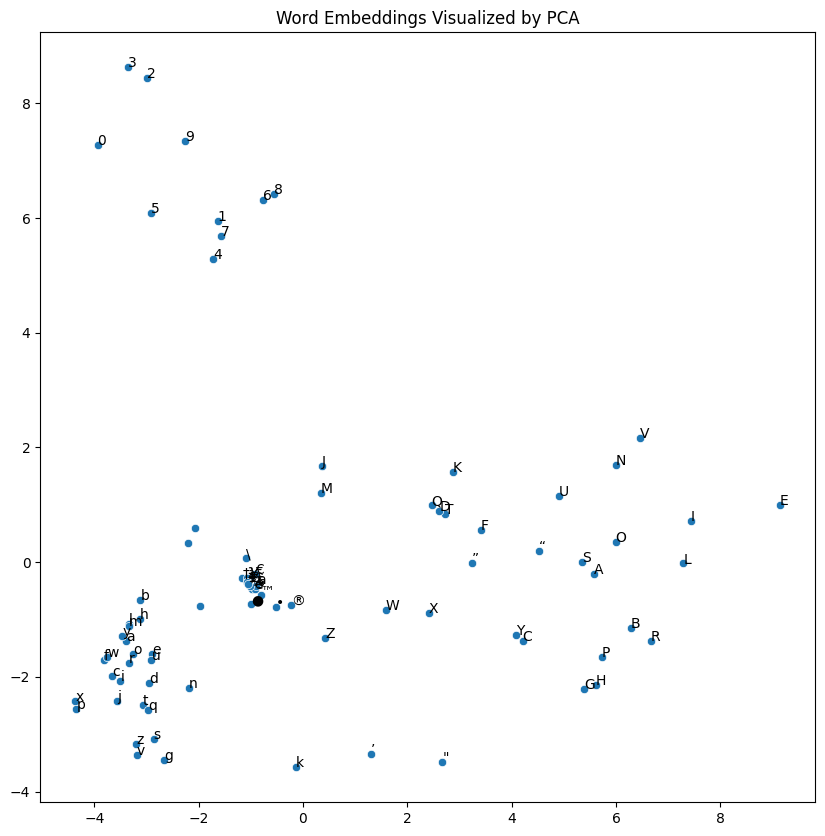

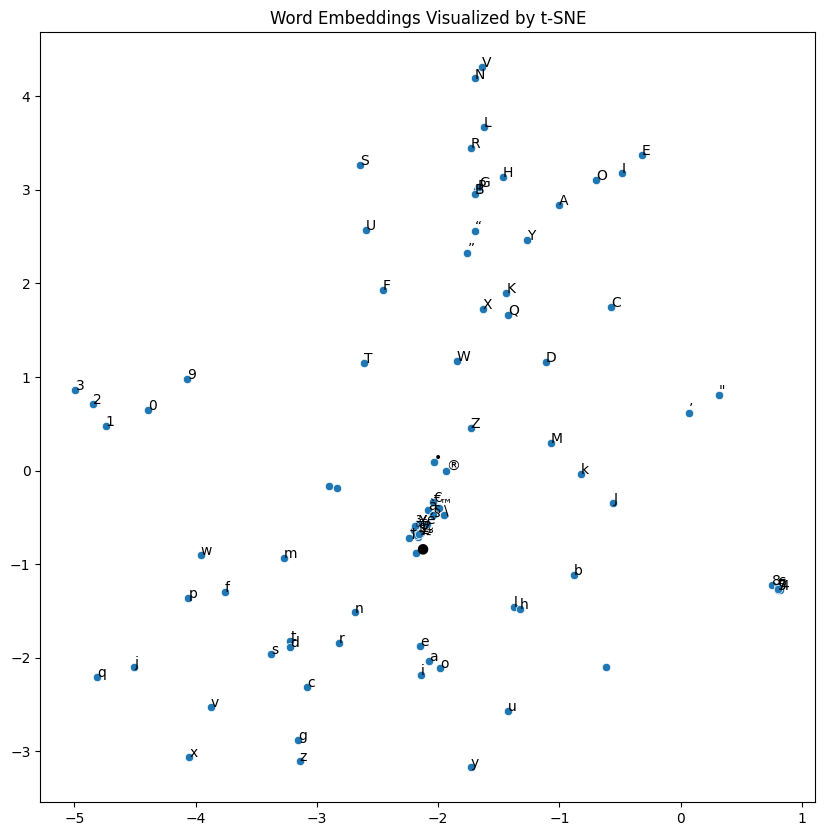

In [6]:


def visualize_embeddings_pca(model):
    words = list(model.wv.index_to_key)

    # Check if there are enough words for PCA
    if len(words) < 2:
        print("Error: At least 2 words are required for PCA.")
        return

    embeddings = [model.wv[word] for word in words]
    embeddings = np.array(embeddings)

    # Perform PCA
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    # Visualize embeddings
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    plt.title('Word Embeddings Visualized by PCA')
    plt.show()

def visualize_embeddings_tsne(model):
    words = list(model.wv.index_to_key)

    # Check if there are enough words for t-SNE
    if len(words) < 2:
        print("Error: At least 2 words are required for t-SNE.")
        return

    embeddings = [model.wv[word] for word in words]
    embeddings = np.array(embeddings)

    # Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)

    # Visualize embeddings
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    plt.title('Word Embeddings Visualized by t-SNE')
    plt.show()

# Example usage assuming w2v_model is already defined and trained
visualize_embeddings_pca(w2v_model)
visualize_embeddings_tsne(w2v_model)

In [7]:
# Evaluate word similarity
# word1 = "man"
# word2 = "city"

# if word1 in w2v_model.wv and word2 in w2v_model.wv:
#     similarity = w2v_model.wv.similarity(word1, word2)
#     print(f"Similarity between '{word1}' and '{word2}': {similarity}")
# else:
#     print(f"At least one of the words '{word1}' or '{word2}' is not present in the vocabulary.")

# # Find most similar words
# word = "king"

# if word in w2v_model.wv:
#     similar_words = w2v_model.wv.most_similar(word)
#     print(f"Words most similar to '{word}': {similar_words}")
# else:
#     print(f"The word '{word}' is not present in the vocabulary.")

In [8]:
#Word Similarity Evaluation
def evaluate_word_similarity(model, word1, word2):
    try:
        similarity_score = model.wv.similarity(word1, word2)
        print(f"Similarity between '{word1}' and '{word2}': {similarity_score:.4f}")
    except KeyError as e:
        print(f"Error: One or both words '{word1}' and '{word2}' not in vocabulary.")


In [9]:
# Word Analogy Evaluation
def evaluate_word_analogy(model, word1, word2, word3, topn=1):
    try:
        analogy_result = model.wv.most_similar(positive=[word2, word3], negative=[word1], topn=topn)
        print(f"Analogy: '{word1}' is to '{word2}' as '{word3}' is to '{analogy_result[0][0]}'")
    except KeyError as e:
        print(f"Error: One or more words '{word1}', '{word2}', '{word3}' not in vocabulary.")


In [10]:
#Semantic Compositionality
def evaluate_compositionality(model, word1, word2, phrase):
    try:
        word1_vec = model.wv[word1]
        word2_vec = model.wv[word2]
        phrase_vec = model.wv[phrase]

        combined_vec = word1_vec - word2_vec + phrase_vec
        closest_word = model.wv.similar_by_vector(combined_vec, topn=1)[0][0]

        print(f"Compositionality: '{word1}' - '{word2}' + '{phrase}' ≈ '{closest_word}'")
    except KeyError as e:
        print(f"Error: One or more words '{word1}', '{word2}', '{phrase}' not in vocabulary.")

In [11]:

# Example of word similarity evaluation
evaluate_word_similarity(w2v_model, 'example', 'sentence')

# Example of word analogy evaluation
evaluate_word_analogy(w2v_model, 'is', 'was', 'eat')

# Example of semantic compositionality evaluation
evaluate_compositionality(w2v_model, 'king', 'man', 'woman')

Error: One or both words 'example' and 'sentence' not in vocabulary.
Error: One or more words 'is', 'was', 'eat' not in vocabulary.
Error: One or more words 'king', 'man', 'woman' not in vocabulary.


In [12]:
import itertools

def find_similar_word_pairs(model, similarity_threshold=0.7, max_pairs=10):
    words = list(model.wv.index_to_key)
    similar_pairs = []

    # Calculate and store similar pairs
    for word1, word2 in itertools.combinations(words, 2):
        similarity_score = model.wv.similarity(word1, word2)
        if similarity_score > similarity_threshold:
            similar_pairs.append((word1, word2, similarity_score))

        # Limit to max_pairs
        if len(similar_pairs) >= max_pairs:
            break

    return similar_pairs

# Example usage:
word2vec_model = w2v_model  # Replace with your Word2Vec model object

similar_pairs = find_similar_word_pairs(w2v_model, similarity_threshold=0.7, max_pairs=10)

# Print or process similar_pairs as needed
for pair in similar_pairs:
    print(f"Similar pair: {pair}")

Similar pair: ('A', 'O', 0.70870924)
Similar pair: ('A', 'P', 0.7005066)
Similar pair: ('A', 'B', 0.7078337)
Similar pair: ('A', 'Y', 0.72190195)
Similar pair: ('A', 'X', 0.7430948)
Similar pair: ('I', 'X', 0.71053165)
Similar pair: ('N', 'L', 0.7162238)
Similar pair: ('9', '8', 0.7194143)
Similar pair: ('R', 'L', 0.79627615)
Similar pair: ('R', 'P', 0.8292835)


In [13]:
!pip install tensorflow

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tokens'])

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(df['tokens'])
max_len = max([len(seq) for seq in sequences])

padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Encoding NER tags
ner_tags = df['ner_tags']
ner_encoder = LabelEncoder()
ner_encoder.fit(np.hstack(ner_tags))

encoded_ner_tags = [ner_encoder.transform(tags) for tags in ner_tags]
padded_ner_tags = pad_sequences(encoded_ner_tags, maxlen=max_len, padding='post')
padded_ner_tags = np.array([to_categorical(tag, num_classes=len(ner_encoder.classes_)) for tag in padded_ner_tags])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, padded_ner_tags, test_size=0.2, random_state=42)



In [15]:
# Model Architecture
model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, input_length=max_len))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dense(len(ner_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5807, 100)         6200      
                                                                 
 bidirectional (Bidirection  (None, 5807, 200)         160800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 5807, 13)          2613      
                                                                 
Total params: 169613 (662.55 KB)
Trainable params: 169613 (662.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [16]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10
109/109 [==============================] - 70s 529ms/step - loss: 0.2625 - accuracy: 0.9727 - val_loss: 0.0520 - val_accuracy: 0.9825
Epoch 2/10
109/109 [==============================] - 44s 407ms/step - loss: 0.0527 - accuracy: 0.9819 - val_loss: 0.0490 - val_accuracy: 0.9825
Epoch 3/10
109/109 [==============================] - 45s 414ms/step - loss: 0.0419 - accuracy: 0.9846 - val_loss: 0.0369 - val_accuracy: 0.9863
Epoch 4/10
109/109 [==============================] - 44s 409ms/step - loss: 0.0354 - accuracy: 0.9863 - val_loss: 0.0310 - val_accuracy: 0.9881
Epoch 5/10
109/109 [==============================] - 45s 414ms/step - loss: 0.0305 - accuracy: 0.9872 - val_loss: 0.0304 - val_accuracy: 0.9876
Epoch 6/10
109/109 [==============================] - 44s 402ms/step - loss: 0.0296 - accuracy: 0.9873 - val_loss: 0.0275 - val_accuracy: 0.9879
Epoch 7/10
109/109 [==============================] - 44s 403ms/step - loss: 0.0283 - accuracy: 0.9877 - val_loss: 0.0264 - val_ac

In [19]:
from sklearn.metrics import classification_report

# Predict probabilities on test data
predictions_prob = model.predict(X_test, verbose=0)
predictions = np.argmax(predictions_prob, axis=-1)

# Flatten y_test to match shape
true_tags_flat = np.argmax(y_test, axis=-1).flatten()

# Convert predictions back to NER tags
predicted_tags_flat = predictions.flatten()

# Inverse transform to original labels
true_tags = ner_encoder.inverse_transform(true_tags_flat)
predicted_tags = ner_encoder.inverse_transform(predicted_tags_flat)

# Classification report
report = classification_report(true_tags, predicted_tags)
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

                   0.99      1.00      0.99   6180210
           
       0.00      0.00      0.00       976
                   0.52      0.26      0.35     61976
           0       0.45      0.06      0.11     50864
           1       0.00      0.00      0.00       191
           2       0.00      0.00      0.00        58
           3       0.00      0.00      0.00       117
           4       0.00      0.00      0.00       115
           5       0.00      0.00      0.00        82
           6       0.00      0.00      0.00        46
           7       0.00      0.00      0.00        57
           8       0.00      0.00      0.00        50
           9       0.00      0.00      0.00        46

    accuracy                           0.98   6294788
   macro avg       0.15      0.10      0.11   6294788
weighted avg       0.98      0.98      0.98   6294788



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
